## Chargement des librairies


In [112]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline


## Chargement des données

In [113]:
filename='data.csv'
df=pd.read_csv(filename,encoding='ISO-8859-1')
df.rename(columns={'energy':'Energy',"danceability":"Danceability","loudness":"Loudness(dB)","acousticness":"Acousticness"},inplace=True)

## Valeurs manquantes

In [114]:
df.isnull().sum()

Acousticness        0
artists             0
Danceability        0
duration_ms         0
Energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
Loudness(dB)        0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

## KNN Algorithms

In [115]:
x=df.loc[:,['Energy','Danceability','Loudness(dB)','Acousticness',"duration_ms","explicit","instrumentalness","mode","speechiness","tempo","valence","year"]].values
y=df.loc[:,'popularity'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1) #stratify=y

sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)
# KNN Classification
# sorted(sklearn.neighbors.VALID_METRICS['brute'])
knn = KNeighborsClassifier(n_neighbors = 71)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

d = {'Réel':y_pred,'Pred':y_test}
results = pd.DataFrame(d)
results.head(5)

,Réel,Pred
0,0,22
1,0,0
2,66,61
3,50,52
4,41,44


## Error MSE (not squared)

In [116]:
print(mean_squared_error(y_test, y_pred, squared=False))

13.111947048245503


## Find the best k-neighbors 

71

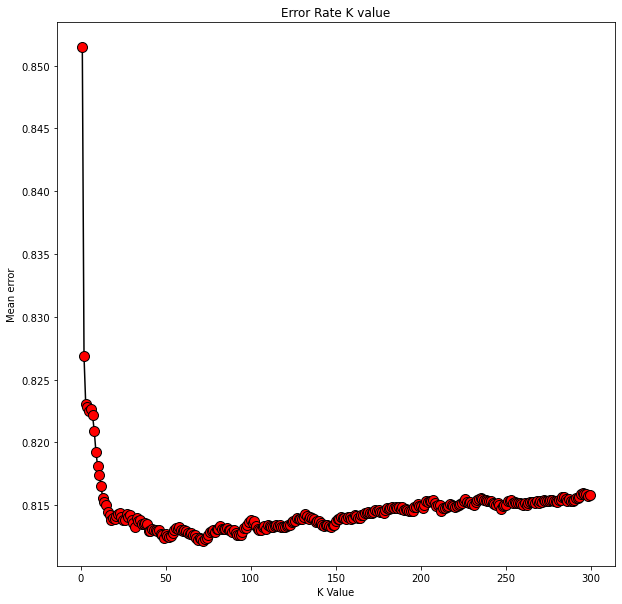

In [16]:
error=[]
n_neighbours=300
for i in range(1,n_neighbours):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(10,10))
plt.plot(range(1,n_neighbours),error,color='black',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean error')
error.index(min(error))

## Dataset split in 5

In [17]:
filename='data.csv'
df=pd.read_csv(filename,encoding='ISO-8859-1')
df.rename(columns={'energy':'Energy',"danceability":"Danceability","loudness":"Loudness(dB)","acousticness":"Acousticness"},inplace=True)

In [18]:
df0=df[df["popularity"] <10]
cond = df['id'].isin(df0['id'])
df.drop(df[cond].index, inplace = True)
df1=df[df["popularity"] < 30]
cond = df['id'].isin(df1['id'])
df.drop(df[cond].index, inplace = True)
df2=df[df["popularity"] < 50]
cond = df['id'].isin(df2['id'])
df.drop(df[cond].index, inplace = True)
df3=df[df["popularity"] < 70]
cond = df['id'].isin(df3['id'])
df.drop(df[cond].index, inplace = True)
df4=df[df["popularity"] < 100]

## Computing 5 new Knn Classifier

In [19]:
x0=df0.loc[:,['Energy','Danceability','Loudness(dB)','Acousticness',"duration_ms","explicit","instrumentalness","mode","speechiness","tempo","valence","year"]].values
y0=df0.loc[:,'popularity'].values
x0_train,x0_test,y0_train,y0_test = train_test_split(x0,y0,test_size = 0.3,train_size = 0.7, random_state = 1)

x1=df1.loc[:,['Energy','Danceability','Loudness(dB)','Acousticness',"duration_ms","explicit","instrumentalness","mode","speechiness","tempo","valence","year"]].values
y1=df1.loc[:,'popularity'].values
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.3,random_state = 1)

x2=df2.loc[:,['Energy','Danceability','Loudness(dB)','Acousticness',"duration_ms","explicit","instrumentalness","mode","speechiness","tempo","valence","year"]].values
y2=df2.loc[:,'popularity'].values
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size = 0.3,random_state = 1)

x3=df3.loc[:,['Energy','Danceability','Loudness(dB)','Acousticness',"duration_ms","explicit","instrumentalness","mode","speechiness","tempo","valence","year"]].values
y3=df3.loc[:,'popularity'].values
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size = 0.3,random_state = 1)

x4=df4.loc[:,['Energy','Danceability','Loudness(dB)','Acousticness',"duration_ms","explicit","instrumentalness","mode","speechiness","tempo","valence","year"]].values
y4=df4.loc[:,'popularity'].values
x4_train,x4_test,y4_train,y4_test = train_test_split(x4,y4,test_size = 0.3,random_state = 1)

In [20]:
x_train=np.concatenate((x0_train,x1_train,x2_train,x3_train,x4_train))
y_train=np.concatenate((y0_train,y1_train,y2_train,y3_train,y4_train))
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
knn = KNeighborsClassifier(n_neighbors = 200)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=200)

## Testing on 5 datasets (from low popularity to high popularity)

In [21]:
x0_test=sc.transform(x0_test)
y0_pred=knn.predict(x0_test)

d = {'Réel':y0_pred,'Pred':y0_test}
results = pd.DataFrame(d)
print(results.head(5))
print(mean_squared_error(y0_test, y0_pred, squared=False))

   Réel  Pred
0    14     7
1     0     0
2     0     0
3     0     8
4     0     0
5.291591058580736


In [22]:
x1_test=sc.transform(x1_test)
y1_pred=knn.predict(x1_test)

d = {'Pred':y1_pred,'Test':y1_test}
results = pd.DataFrame(d)
print(results.head(5))
print(mean_squared_error(y1_test, y1_pred, squared=False))

   Pred  Test
0    36    28
1     0    29
2    27    21
3    36    27
4     0    18
13.744795923180822


In [23]:
x2_test=sc.transform(x2_test)
y2_pred=knn.predict(x2_test)

d = {'Pred':y2_pred,'Test':y2_test}
results = pd.DataFrame(d)
print(results.head(5))
print(mean_squared_error(y2_test, y2_pred, squared=False))

   Pred  Test
0    43    49
1    48    37
2    38    41
3    44    43
4    33    43
14.001286119894573


In [24]:
x3_test=sc.transform(x3_test)
y3_pred=knn.predict(x3_test)

d = {'Pred':y3_pred,'Test':y3_test}
results = pd.DataFrame(d)
print(results.head(5))
print(mean_squared_error(y3_test, y3_pred, squared=False))

   Pred  Test
0    34    57
1    44    50
2    50    52
3    36    56
4    42    51
16.899526306765125


In [25]:
x4_test=sc.transform(x4_test)
y4_pred=knn.predict(x4_test)

d = {'Pred':y4_pred,'Test':y4_test}
results = pd.DataFrame(d)
print(results.head(5))
print(mean_squared_error(y4_test, y4_pred, squared=False))

   Pred  Test
0    66    70
1    28    70
2    66    71
3    63    83
4    66    70
24.265162085644192


## Testing knn training on past ten years

In [203]:
filename='data.csv'
df=pd.read_csv(filename,encoding='ISO-8859-1')
df.rename(columns={'energy':'Energy',"danceability":"Danceability","loudness":"Loudness(dB)","acousticness":"Acousticness"},inplace=True)

In [204]:
df=df[df["year"]>2000]

In [205]:
x=df.loc[:,['Energy','Danceability','Loudness(dB)','Acousticness',"duration_ms","explicit","instrumentalness","mode","speechiness","tempo","valence","year"]].values
y=df.loc[:,'popularity'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1) #stratify=y

In [135]:
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)
# KNN Classification
# sorted(sklearn.neighbors.VALID_METRICS['brute'])
knn = KNeighborsClassifier(n_neighbors = 71)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
d = {'Réel':y_pred,'Pred':y_test}
results = pd.DataFrame(d)
results.head(5)

,Réel,Pred
0,68,66
1,42,54
2,54,65
3,70,62
4,44,64


In [136]:
print(mean_squared_error(y_test, y_pred, squared=False))

10.037941805955851


## Predict data of 2019 by training on 2018

In [250]:
filename='data.csv'
df=pd.read_csv(filename,encoding='ISO-8859-1')
df.rename(columns={'energy':'Energy',"danceability":"Danceability","loudness":"Loudness(dB)","acousticness":"Acousticness"},inplace=True)

In [251]:
x_train=df[df['year'] == 2018]
x_train=x_train.loc[:,['Energy','Danceability','Loudness(dB)','Acousticness',"duration_ms","explicit","instrumentalness","mode","speechiness","tempo","valence","year"]].values
y_train=df[df["year"]==2018]
y_train=y_train.loc[:,'popularity'].values
x_test=df[df['year'] == 2019]
x_test=x_test.loc[:,['Energy','Danceability','Loudness(dB)','Acousticness',"duration_ms","explicit","instrumentalness","mode","speechiness","tempo","valence","year"]].values
y_test=df[df["year"]==2019]
y_test=y_test.loc[:,'popularity'].values


In [252]:
y_test

array([72, 67, 71, ..., 65, 77, 67], dtype=int64)

In [253]:
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)
# KNN Classification
# sorted(sklearn.neighbors.VALID_METRICS['brute'])
knn = KNeighborsClassifier(n_neighbors = 45)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

d = {'Réel':y_pred,'Pred':y_test}
results = pd.DataFrame(d)
results.head(5)

,Réel,Pred
0,61,72
1,63,67
2,64,71
3,63,81
4,61,65


In [254]:
print(mean_squared_error(y_test, y_pred, squared=False))

9.12211598259965


## Create a column artist pop

In [33]:
dfData=pd.read_csv("data.csv")
dataArtist=pd.read_csv("data_by_artist.csv",)
dataArtist=dataArtist[["artists","popularity"]]
dfData["artists"]=dfData["artists"].str.replace("[","").str.replace("]","").str.replace("'",'').str.split(",")
dfData=dfData.explode("artists")
df=pd.merge(dfData,dataArtist,left_on="artists",right_on="artists")
df=df.rename(columns={"popularity_x":"popularity","popularity_y":"artistPop"})
df=df.drop_duplicates(subset=['id'])

In [62]:
df.rename(columns={'energy':'Energy',"danceability":"Danceability","loudness":"Loudness(dB)","acousticness":"Acousticness"},inplace=True)

x=df.loc[:,['Energy','Danceability','Loudness(dB)','Acousticness',"duration_ms","instrumentalness","speechiness","tempo","valence","year","artistPop"]].values
y=df.loc[:,'popularity'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)
# KNN Classification
# sorted(sklearn.neighbors.VALID_METRICS['brute'])
knn = KNeighborsClassifier(n_neighbors = 104)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

d = {'Réel':y_pred,'Pred':y_test}
results = pd.DataFrame(d)
results.head(5)

,Réel,Pred
0,0,0
1,9,14
2,47,42
3,0,29
4,51,55


In [63]:
print(mean_squared_error(y_test, y_pred, squared=False))
# Est ce que les 20% sont liés au fait qu'il prédit souvent des 0 ?

10.857257364928074


104

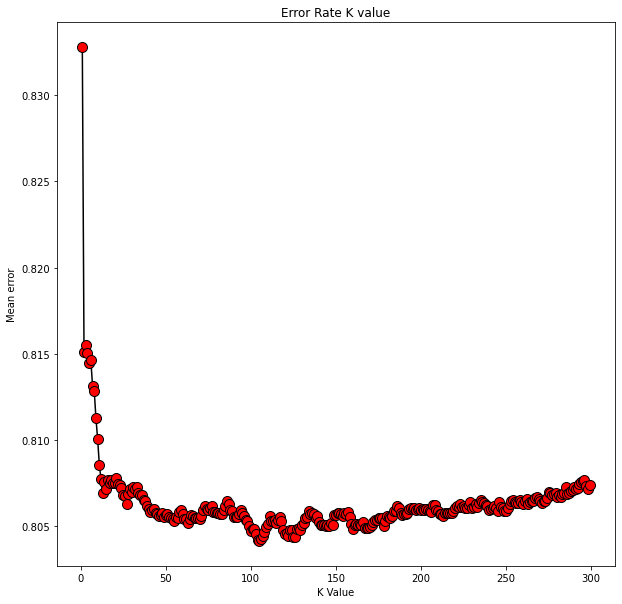

In [36]:
error=[]
for i in range(1,300):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(10,10))
plt.plot(range(1,300),error,color='black',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean error')
error.index(min(error))

In [37]:
error
error.index(min(error))

104

## Create a dict of artists

In [76]:
df=pd.read_csv("data.csv")

In [77]:
df["artists"]=df["artists"].str.replace("[","").str.replace("]","").str.replace("'",'').str.split(",")
df=df.explode("artists")

In [78]:
artists=np.array(df["artists"])
artists_name, key_artists = np.unique(artists, return_inverse=True)
dict_artist_key = dict(zip(artists, key_artists))

In [79]:
dict_artist_key

{'Carl Woitschach': 14757,
 'Robert Schumann': 26097,
 ' Vladimir Horowitz': 11109,
 'Seweryn Goszczyński': 26854,
 'Francisco Canaro': 17707,
 'Frédéric Chopin': 17880,
 'Felix Mendelssohn': 17483,
 'Franz Liszt': 17782,
 ' Charlo': 1921,
 'Sergei Rachmaninoff': 26836,
 'Samuel Barber': 26635,
 'Ludwig van Beethoven': 22354,
 ' Staatskapelle Berlin': 9831,
 ' Richard Strauss': 8928,
 'George Butterworth': 18106,
 ' John Cameron': 5184,
 'Alexander Scriabin': 12577,
 ' Luis Scalon': 6546,
 'Thomas Arne': 29525,
 ' John Heddle Nash': 5211,
 'Moritz Moszkowski': 23727,
 'Roger Quilter': 26188,
 'Hafız Yaşar': 18703,
 'Muzio Clementi': 23873,
 'Ignacio Corsini': 19238,
 'Shungi Music Crew': 27037,
 'Perchicot': 25014,
 'Dmitry Kabalevsky': 16443,
 'Paul Whiteman': 24935,
 'Ted Weems & His Orchestra': 28119,
 'Taj Mahal': 28011,
 'John Raitt': 20313,
 'Leroy Carr': 21709,
 'Hikmet Rıza Hanım': 19005,
 'Elsie Houston': 17073,
 'Αντώνης Νταλγκάς': 31217,
 'Stellakis Perpiniadis': 27577,
 'Αν

In [41]:
list_artistes=[]
for key in df["artists"]:
    list_artistes.append(dict_artist_key[key])

In [42]:
df["artistes_id"]=list_artistes

In [43]:
df[df["artists"]=="Avicii"].head(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,artistes_id
8047,0.0715,Avicii,0.592,277262,0.873,0,0vrmHPfoBadXVr2n0m1aqZ,0.009820,9,0.142,-5.650,1,Heaven,76,2019-06-06,0.0275,122.011,0.516,2019,13297
15645,0.0481,Avicii,0.630,232760,0.666,0,260jSxvzkFt71ksvkcy2ke,0.000567,7,0.104,-7.186,1,Broken Arrows,63,2015-10-02,0.0450,115.973,0.288,2015,13297
39639,0.0386,Avicii,0.639,206067,0.843,0,7kbTZWt7DnzIzbkyzFE1PW,0.082900,5,0.108,-3.393,1,For A Better Day,67,2015-10-02,0.0334,135.002,0.317,2015,13297


In [44]:
df.rename(columns={'energy':'Energy',"danceability":"Danceability","loudness":"Loudness(dB)","acousticness":"Acousticness"},inplace=True)

x=df.loc[:,['Energy','Danceability','Loudness(dB)','Acousticness',"duration_ms","instrumentalness","speechiness","tempo","valence","year","artistes_id"]].values
y=df.loc[:,'popularity'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)
# KNN Classification
# sorted(sklearn.neighbors.VALID_METRICS['brute'])
knn = KNeighborsClassifier(n_neighbors = 200)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

d = {'Réel':y_pred,'Pred':y_test}
results = pd.DataFrame(d)
results.head(5)

,Réel,Pred
0,63,75
1,34,59
2,27,16
3,0,0
4,0,0


In [45]:
print(mean_squared_error(y_test, y_pred, squared=False))
# Est ce que les 20% sont liés au fait qu'il prédit souvent des 0 ?

13.318804053456862


## Knn pour prédire top100 (classification) + artiste pop


In [47]:
dfData=pd.read_csv("data.csv")
dataArtist=pd.read_csv("data_by_artist.csv",)
dataArtist=dataArtist[["artists","popularity"]]
dfData["artists"]=dfData["artists"].str.replace("[","").str.replace("]","").str.replace("'",'').str.split(",")
dfData=dfData.explode("artists")
df=pd.merge(dfData,dataArtist,left_on="artists",right_on="artists")
df=df.rename(columns={"popularity_x":"popularity","popularity_y":"artistPop"})
df=df.drop_duplicates(subset=['id'])

In [48]:
data = df

# DataSet des Top Hit (jusqu'à 2017)
top_songs = pd.read_csv("top_data.csv", encoding="iso-8859-1")

# On filtre donc notre DataSet de départ pour conserver seuelement les musiques avec date > 2017
data_2017 = data[data["year"]<2017]

# On recherche l'existence des musiques dans le DataSet des Hit Songs pour créer une nouvelle variable de succès 
data_2017["top"] = data_2017["name"].isin(top_songs["title"])

df=data_2017

In [49]:
# DataSet de départ

df.rename(columns={'energy':'Energy',"danceability":"Danceability","loudness":"Loudness(dB)","acousticness":"Acousticness"},inplace=True)

x=df.loc[:,['Energy','Danceability','Loudness(dB)','Acousticness',"duration_ms","instrumentalness","speechiness","tempo","valence","year","artistPop"]].values
y=df.loc[:,'top'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [50]:
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)
# ça n'a pas de sens pour moi de fit les données
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

d = {'Réel':y_pred,'Pred':y_test}
results = pd.DataFrame(d)
results.head(5)

,Réel,Pred
0,False,False
1,False,False
2,True,False
3,False,False
4,True,True


error=[]
for i in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(10,10))
plt.plot(range(1,100),error,color='black',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean error')
error.index(min(error))

In [51]:
print('Original data shape %s' % Counter(y_test))
print('Original data shape %s' % Counter(y_pred))

Original data shape Counter({False: 41818, True: 6197})
Original data shape Counter({False: 41502, True: 6513})


In [52]:
from sklearn.metrics import plot_confusion_matrix
cf_matrix=sklearn.metrics.confusion_matrix(y_test, y_pred)
cf_matrix

array([[37217,  4601],
       [ 4285,  1912]], dtype=int64)

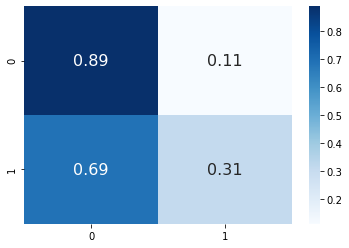

In [53]:
a=cf_matrix[0]/np.sum(cf_matrix[0])
b=cf_matrix[1]/np.sum(cf_matrix[1])
sns.heatmap([a,b], annot=True,cmap='Blues', annot_kws={"size": 16}) # font size

#r
#e
#a
#prediction

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8149328334895345

In [56]:
#Combiner top100 avec artist_popularité
#k-Fold Cross-Validation

## Oversampling for classification

In [65]:
df.rename(columns={'energy':'Energy',"danceability":"Danceability","loudness":"Loudness(dB)","acousticness":"Acousticness"},inplace=True)

x=df.loc[:,['Energy','Danceability','Loudness(dB)','Acousticness',"duration_ms","instrumentalness","speechiness","tempo","valence","year","artistPop"]].values
y=df.loc[:,'top'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [57]:


#oversampling 
print('Original data shape %s' % Counter(y_train))
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)
print('Resampled data shape %s' % Counter(y_train))

Original data shape Counter({False: 97727, True: 14308})
Resampled data shape Counter({False: 97727, True: 97727})


In [58]:
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)
# ça n'a pas de sens pour moi de fit les données
knn = KNeighborsClassifier(n_neighbors = 42)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

d = {'Réel':y_pred,'Pred':y_test}
results = pd.DataFrame(d)
results.head(5)
from sklearn.metrics import plot_confusion_matrix
cf_matrix=sklearn.metrics.confusion_matrix(y_test, y_pred)
cf_matrix

array([[26434, 15384],
       [ 1686,  4511]], dtype=int64)

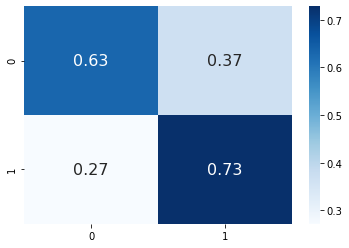

In [59]:
a=cf_matrix[0]/np.sum(cf_matrix[0])
b=cf_matrix[1]/np.sum(cf_matrix[1])
sns.heatmap([a,b], annot=True,cmap='Blues', annot_kws={"size": 16}) # font size

#r
#e
#a
#prediction

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6444860980943455

## Under Sampling

In [66]:
df.rename(columns={'energy':'Energy',"danceability":"Danceability","loudness":"Loudness(dB)","acousticness":"Acousticness"},inplace=True)

x=df.loc[:,['Energy','Danceability','Loudness(dB)','Acousticness',"duration_ms","instrumentalness","speechiness","tempo","valence","year","artistPop"]].values
y=df.loc[:,'top'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [68]:
from imblearn.over_sampling import RandomOverSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(x, y)

NameError: name 'RandomUnderSampler' is not defined

## Knn with names vectorised

In [81]:
dfData=pd.read_csv("data.csv")
dataArtist=pd.read_csv("data_by_artist.csv",)
dataArtist=dataArtist[["artists","popularity"]]
dfData["artists"]=dfData["artists"].str.replace("[","").str.replace("]","").str.replace("'",'').str.split(",")
dfData=dfData.explode("artists")
df=pd.merge(dfData,dataArtist,left_on="artists",right_on="artists")
df=df.rename(columns={"popularity_x":"popularity","popularity_y":"artistPop"})
df=df.drop_duplicates(subset=['id'])

data = df

# DataSet des Top Hit (jusqu'à 2017)
top_songs = pd.read_csv("top_data.csv", encoding="iso-8859-1")

# On filtre donc notre DataSet de départ pour conserver seuelement les musiques avec date > 2017
data_2017 = data[data["year"]<2017]

# On recherche l'existence des musiques dans le DataSet des Hit Songs pour créer une nouvelle variable de succès 
data_2017["top"] = data_2017["name"].isin(top_songs["title"])

df=data_2017
# DataSet de départ


In [82]:
df["name"]

0                  Singende Bataillone 1. Teil
1                          Per aspera ad astra
2                  Singende Bataillone 2. Teil
3                             Lore, Lore, Lore
4                      Reserve hat Ruh 2. Teil
                          ...                 
167697                             Clean Slate
167699                             En Silencio
167700                     Over And Over Again
167701    Discord - The Living Tombstone Remix
167702                  We Don't Have To Dance
Name: name, Length: 160050, dtype: object

In [83]:
name=df["name"]
vectorizer = CountVectorizer(stop_words='english')
bowVect = vectorizer.fit(name)
bowTrain = vectorizer.transform(["Singende"])
print(bowTrain)
# print(bowTest)

  (0, 40823)	1


In [84]:
vectorizer = CountVectorizer(stop_words='english')
bowVect = vectorizer.fit(df["name"])
def vectorizeName(name):   
    bowTrain = vectorizer.transform([name])
    return bowTrain
df["counts"] = df["name"].apply(vectorizeName)


In [70]:
df.rename(columns={'energy':'Energy',"danceability":"Danceability","loudness":"Loudness(dB)","acousticness":"Acousticness"},inplace=True)

x=df.loc[:,['Energy','Danceability','Loudness(dB)','Acousticness',"duration_ms","instrumentalness","speechiness","tempo","valence","year","counts"]].values
y=df.loc[:,'top'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
# sc=StandardScaler()
# sc.fit(x_train)
# x_train=sc.transform(x_train)
# x_test=sc.transform(x_test)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

d = {'Réel':y_pred,'Pred':y_test}
results = pd.DataFrame(d)
results.head(5)

ValueError: setting an array element with a sequence.

In [90]:
!pip install mlxtend

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
import mlxtend
from mlxtend.plotting import plot_decision_regions

dfData=pd.read_csv("data.csv")
dataArtist=pd.read_csv("data_by_artist.csv",)
dataArtist=dataArtist[["artists","popularity"]]
dfData["artists"]=dfData["artists"].str.replace("[","").str.replace("]","").str.replace("'",'').str.split(",")
dfData=dfData.explode("artists")
df=pd.merge(dfData,dataArtist,left_on="artists",right_on="artists")
df=df.rename(columns={"popularity_x":"popularity","popularity_y":"artistPop"})
df=df.drop_duplicates(subset=['id'])

data = df

# DataSet des Top Hit (jusqu'à 2017)
top_songs = pd.read_csv("top_data.csv", encoding="iso-8859-1")

# On filtre donc notre DataSet de départ pour conserver seuelement les musiques avec date > 2017
data_2017 = data[data["year"]<2017]

# On recherche l'existence des musiques dans le DataSet des Hit Songs pour créer une nouvelle variable de succès 
data_2017["top"] = data_2017["name"].isin(top_songs["title"])

df=data_2017
# DataSet de départ

In [108]:
def knn_comparison(data, k):
    x = df[["loudness","danceability"]].values
    y = df["top"].astype(int).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
    # Adding axes annotations
    plt.xlabel("loudness")
    plt.ylabel("acousticness")
    plt.title("Knn graph")
    plt.show()
    plt.figure(figsize=(100,100))

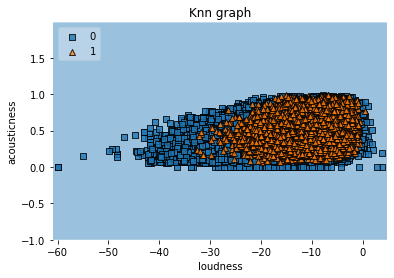

<Figure size 7200x7200 with 0 Axes>

In [109]:
for i in [104]:
    knn_comparison(df, i)

In [99]:
df["top"].value_counts()

False    139545
True      20505
Name: top, dtype: int64

In [ ]:
#13.06  alone